<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_04_AdvancedSelect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Select: Advanced Retrieval With Mario Brothers Plumbing
### Database and SQL Through Pop Culture | Brendan SHea, PhD

In this chapter, we dive into the world of advanced data retrieval techniques using SQL, focusing on the Mario Brothers Plumbing database. The chapter begins by introducing the database schema, which consists of six interconnected tables designed to manage various aspects of the plumbing business. We explore the relationships between these tables and discuss the significance of data types such as JSON and DECIMAL.

Next, we delve into the powerful GROUP BY clause in SQL, learning how to group rows based on one or more columns and perform aggregate calculations. We also cover the HAVING clause, which allows us to filter grouped rows based on specific conditions.

The chapter then introduces subqueries, explaining how they can be used to nest queries within one another to perform complex data retrieval tasks. We explore the concept of Big O notation and its relevance to query performance, using simple examples set in the Mushroom Kingdom.

Moving on, we discuss the integration of JSON data in modern relational databases, specifically SQLite. We learn how to store, query, and manipulate JSON data within SQL, showcasing the flexibility and power of this approach.

Finally, we present a detailed case study that demonstrates the importance of business continuity planning in the context of the Toad Medical Center. We cover key aspects of disaster recovery, including planning, documentation, techniques, and testing. We also explore data backup strategies, storage considerations, and retention policies.

Throughout the chapter, we provide numerous hands-on examples and exercises to reinforce the concepts and techniques covered. By the end of this chapter, readers will have a solid understanding of advanced data retrieval techniques using SQL and be well-equipped to apply these skills in real-world scenarios.

Learning Outcomes:

1.  Understand the schema and relationships of a sample database.
2.  Master the usage of the GROUP BY and HAVING clauses in SQL for grouping and filtering data.
3.  Learn how to use subqueries to perform complex data retrieval tasks.
4.  Gain insights into query performance using Big O notation.
5.  Understand how to store, query, and manipulate JSON data within SQL.
6.  Recognize the importance of business continuity planning and disaster recovery strategies.
7.  Familiarize yourself with key aspects of disaster recovery, including planning, documentation, techniques, and testing.
8.  Learn about data backup strategies, storage considerations, and retention policies.


Keywords: SQL, advanced data retrieval, database schema, JSON, DECIMAL, GROUP BY, HAVING, subqueries, Big O notation, business continuity, disaster recovery, data backup

## Brendan's Lecture

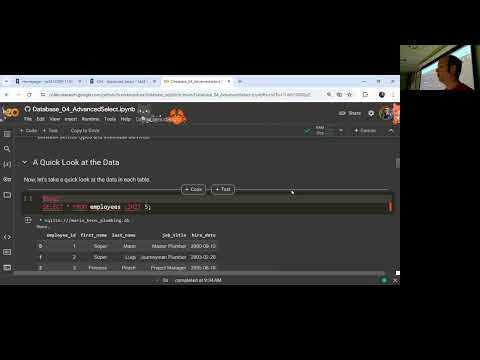

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('G6UZGGMNebI', width=800, height=500)

### BrendyBot is Here to Answer Your Questions
![image.png](https://github.com/brendanpshea/colab-utilities/raw/main/brendy_bot_pic.png)

If you have questions about the content of this chapter, you can try out "BrendyBot", an AI chat bot I've trained on the lecture notes for this class (note that BrendyBot is stil experimental, and can definitley make mistakes!).

https://poe.com/BrendyBot

## Mario Brothers Plumbing: Database Schema
In this lesson, we'll be working with a database that represents the plumbing business of the famous "Mario Brothers". Let's get started.

First, we'll load the database and display the basic schema.

In [ ]:
# download database
!wget https://github.com/brendanpshea/database_sql/raw/main/data/mario_bros_plumbing.db -q -nc
!pip install prettytable==0.7.2 --force-reinstall -q

import pandas as pd

# Load sql magic and connect
%reload_ext sql
%config SqlMagic.autopandas=True
pd.set_option('display.max_colwidth', 150)
%sql sqlite:///mario_bros_plumbing.db

In [ ]:
# display schema (SQLite)
%%sql
SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:///mario_bros_plumbing.db
Done.


,type,name,tbl_name,rootpage,sql
0,table,Customers,Customers,2,"CREATE TABLE Customers (\n customer_id INTEGER PRIMARY KEY,\n first_name VARCHAR(255),\n last_name VARCHAR(255),\n address JSON,\n phone_numb..."
1,table,Employees,Employees,3,"CREATE TABLE Employees (\n employee_id INTEGER PRIMARY KEY,\n first_name VARCHAR(255),\n last_name VARCHAR(255),\n job_title VARCHAR(255),\n ..."
2,table,ServiceTypes,ServiceTypes,4,"CREATE TABLE ServiceTypes (\n service_type_id INTEGER PRIMARY KEY,\n service_type_name VARCHAR(255),\n description VARCHAR(255)\n)"
3,table,Services,Services,5,"CREATE TABLE Services (\n service_id INTEGER PRIMARY KEY,\n service_type_id INTEGER,\n service_name VARCHAR(255),\n description VARCHAR(255),\..."
4,table,Orders,Orders,6,"CREATE TABLE Orders (\n -- Keeps track of a customer's orders\n order_id INTEGER PRIMARY KEY,\n customer_id INTEGER,\n employee_id INTEGER,\n ..."
5,table,Order_Items,Order_Items,7,CREATE TABLE Order_Items (\n -- Keeps track of a customer's order items\n -- This is one line on an invoice\n order_item_id INTEGER PRIMARY KEY...


## Database Overview
The "Mario Brothers Plumbing" database consists of six interconnected tables designed to manage a plumbing business:

1.  **Customers**: Stores customer information, including a JSON field for address.
2.  **Employees**: Stores employee information, including job title and hire date.
3.  **ServiceTypes**: Stores service type information, including name and description.
4.  **Services**: Stores service information, including name, description, and price (DECIMAL).
5.  **Orders**: Stores order information, including customer, employee, date, and total amount (DECIMAL).
6.  **Order_Items**: Stores order item information, including order, service, and quantity.

### Data Types: JSON and DECIMAL
Two notable data types used in this database are JSON and DECIMAL.

JSON (JavaScript Object Notation) is a lightweight data interchange format that allows for flexible and structured data representation. It can store complex data types like objects and arrays. In this database, JSON is used to store customer addresses, as it provides a convenient way to store and retrieve structured address data without the need for separate address-related tables. Later in this chapter, we'll see how to use SQLite to query this data.

DECIMAL is a data type used to store precise numeric values, with a specified precision and scale. It is suitable for storing monetary values, such as prices and total amounts, where exactness is crucial. In this database, DECIMAL(10,2) is used, allowing for prices and total amounts up to 99,999,999.99.

### Relationships

The tables in this database are related through one-to-many relationships, established using foreign key constraints:

-   **Customers** and **Orders**: A customer can have multiple orders, but an order belongs to only one customer. This is a one-to-many relationship, with the `customer_id` foreign key in the Orders table referencing the `customer_id` primary key in the Customers table.
-   **Employees** and **Orders**: An employee can handle multiple orders, but an order is handled by only one employee. This is a one-to-many relationship, with the `employee_id` foreign key in the Orders table referencing the `employee_id` primary key in the Employees table.
-   **Orders** and **Order_Items**: An order can have multiple order items, but an order item belongs to only one order. This is a one-to-many relationship, with the `order_id` foreign key in the Order_Items table referencing the `order_id` primary key in the Orders table.
-   **Services** and **Order_Items**: A service can be included in multiple order items, but an order item includes only one service. This is a one-to-many relationship, with the `service_id` foreign key in the Order_Items table referencing the `service_id` primary key in the Services table.

### Sub-type Relationship

In this database, Services are a **sub-type** of ServiceTypes. This means that each service belongs to a specific service type, and the service type provides a way to categorize and group related services.

The sub-type relationship is encoded in the relational database using a one-to-many relationship between the ServiceTypes and Services tables. The `service_type_id` foreign key in the Services table references the `service_type_id` primary key in the ServiceTypes table. This relationship ensures that each service is associated with a valid service type and allows for efficient querying and data integrity maintenance.

By using a sub-type relationship, the database can store common attributes of service types in the ServiceTypes table, while specific details of individual services are stored in the Services table. This design promotes data normalization, reduces data redundancy, and allows for easier management and extension of the service catalog.

## AN ERD for Mario Brothers Plumbing
Now, let's take a look a the entity-relationship diagram for this database.

In [ ]:
import base64
from IPython.display import Image, display, HTML

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
erDiagram
    CUSTOMERS ||--o{ ORDERS : places
    EMPLOYEES ||--o{ ORDERS : handles
    ORDERS ||--|{ ORDER_ITEMS : contains
    SERVICES ||--o{ ORDER_ITEMS : "included in"
    SERVICETYPES ||--|{ SERVICES : categorizes

    CUSTOMERS {
        integer customer_id PK
        varchar first_name
        varchar last_name
        json address
        varchar phone_number
    }

    EMPLOYEES {
        integer employee_id PK
        varchar first_name
        varchar last_name
        varchar job_title
        date hire_date
    }

    SERVICETYPES {
        integer service_type_id PK
        varchar service_type_name
        varchar description
    }

    SERVICES {
        integer service_id PK
        integer service_type_id FK
        varchar service_name
        varchar description
        decimal price
    }

    ORDERS {
        integer order_id PK
        integer customer_id FK
        integer employee_id FK
        date order_date
        decimal total_amount
    }

    ORDER_ITEMS {
        integer order_item_id PK
        integer order_id FK
        integer service_id FK
        integer quantity
    }
""")

If you look closely, here's what this ERD shows us:
1.  Each customer can place multiple orders, but each order is associated with only one customer. This is shown by the one-to-many relationship between CUSTOMERS and ORDERS. The diagram indicates that a customer record contains basic information like name, address, and phone number, while an order includes details such as the order date and total amount.
2. Employees are responsible for handling orders. The diagram shows a one-to-many relationship between EMPLOYEES and ORDERS, meaning one employee can handle multiple orders, but each order is handled by only one employee. Employee information includes their name, job title, and hire date.
3. An order consists of multiple order items, represented by the one-to-many relationship between ORDERS and ORDER_ITEMS. Each order item is linked to a specific service and includes the quantity of that service ordered. This structure allows for flexibility in creating orders with various services.
4. The diagram illustrates a two-level **subtype-supertype** hierarchy for services. SERVICETYPES categorize the SERVICES offered. Each service belongs to one service type, but a service type can have multiple services. This allows for grouping similar services (e.g., "exterior wash" or "interior cleaning") while maintaining detailed information about each specific service, including its name, description, and price.
5.  The use of primary keys (PK) and foreign keys (FK) in the diagram ensures data integrity and establishes clear relationships between entities. For example, the order_id in ORDER_ITEMS is a foreign key referencing the primary key in ORDERS, ensuring that every order item is associated with a valid order. Similarly, the service_id in SERVICES is linked to SERVICE_TYPES, maintaining the hierarchical relationship between service types and individual services.

## A Quick Look at the Data
Now, let's take a quick look at the data in each table.

In [ ]:
%%sql
SELECT * FROM employees LIMIT 5;

 * sqlite:///mario_bros_plumbing.db
Done.


,employee_id,first_name,last_name,job_title,hire_date
0,1,Super,Mario,Master Plumber,2000-09-13
1,2,Super,Luigi,Journeyman Plumber,2003-02-20
2,3,Princess,Peach,Project Manager,2005-06-10
3,4,Cat,Peach,Apprentice Plumber,2014-11-05
4,5,Tanuki,Mario,Plumbing Technician,2011-04-28


In [ ]:
%%sql
SELECT * FROM customers LIMIT 5;

 * sqlite:///mario_bros_plumbing.db
Done.


,customer_id,first_name,last_name,address,phone_number
0,1,Peach,Toadstool,"{""street"": ""Mushroom Castle"", ""city"": ""Toad Town""}",(555) 123-4567
1,2,Yoshi,Dino,"{""street"": ""24 Egg Island"", ""city"": ""Dinosaur Land"", ""apartment"": ""A""}",(555) 987-6543
2,3,Daisy,Sarasa,"{""street"": ""10 Sarasaland Way"", ""city"": ""Chai Kingdom""}",(555) 456-7890
3,4,Toadette,Toadstool,"{""street"": ""15 Mushroom St"", ""city"": ""Toad Town"", ""apartment"": ""2B""}",(555) 789-0123
4,5,Bowser,Koopa,"{""street"": ""1 Bowser Castle"", ""city"": ""Dark Land""}",(555) 654-3210


In [ ]:
%%sql
SELECT * FROM serviceTypes LIMIT 5;

 * sqlite:///mario_bros_plumbing.db
Done.


,service_type_id,service_type_name,description
0,1,Repair,Services related to fixing and repairing plumbing issues
1,2,Installation,Services related to installing new plumbing fixtures and systems
2,3,Inspection,Services related to inspecting and assessing plumbing systems


In [ ]:
%%sql
SELECT * FROM services LIMIT 5;

 * sqlite:///mario_bros_plumbing.db
Done.


,service_id,service_type_id,service_name,description,price
0,1,1,Pipe Repair,Fix leaky or broken pipes,50
1,2,1,Drain Cleaning,Clear clogged drains and pipes,75
2,3,2,Toilet Installation,Install a new toilet,150
3,4,2,Sink Replacement,Replace an old or damaged sink,200
4,5,1,Water Heater Repair,Fix issues with water heaters,120


In [ ]:
%%sql
SELECT * FROM orders LIMIT 5;

 * sqlite:///mario_bros_plumbing.db
Done.


,order_id,customer_id,employee_id,order_date,total_amount
0,1,3,1,2001-10-14,925
1,2,2,1,2010-05-29,825
2,3,1,3,2008-03-14,1025
3,4,6,3,2008-04-16,1140
4,5,2,1,2016-03-03,750


In [ ]:
%%sql
SELECT * FROM order_items LIMIT 5;

 * sqlite:///mario_bros_plumbing.db
Done.


,order_item_id,order_id,service_id,quantity
0,1,1,1,1
1,2,1,4,2
2,3,1,1,3
3,4,1,2,3
4,5,1,1,2


## Using GROUP BY in SQL

The `GROUP BY` clause in SQL is used to group rows in a result set based on one or more columns. It is often used in combination with aggregate functions like `COUNT()`, `SUM()`, `AVG()`, `MIN()`, and `MAX()` to perform calculations on grouped data.

The basic syntax of `GROUP BY` is as follows:

```sql
SELECT
 column1,
 column2,
 ...,
 aggregate_function(column) -- Ex: SUM(), COUNT(), AVG()
FROM
 table_name
GROUP BY column1, column2, ...;
```

When using `GROUP BY`, the `SELECT` statement should only include columns that are either listed in the `GROUP BY` clause or used with an aggregate function. The `GROUP BY` clause comes after the `FROM` and `WHERE` clauses but before the `ORDER BY` clause.

Let's explore some examples using the "Mario Brothers Plumbing" database to understand how GROUP BY can be used in practice.

### Example: Counting Orders per Customer (with Table Aliases)

Suppose we want to count the number of orders placed by each customer. We can use `GROUP BY` with the `COUNT()` aggregate function to achieve this.

In [ ]:
%%sql
--Number of orders by each customer
SELECT
  c.customer_id AS "customer_id",
  c.first_name,
  c.last_name,
  COUNT(o.order_id) AS order_count
FROM
  Customers c -- We use a Table alias "c" for "Customers"
  -- Table alias "o" for orders
  JOIN Orders o ON c.customer_id = o.customer_id
-- We group by all columns in the select clause, but NOT the COUNT
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY order_count DESC
LIMIT 10;

 * sqlite:///mario_bros_plumbing.db
Done.


,customer_id,first_name,last_name,order_count
0,3,Daisy,Sarasa,67
1,1,Peach,Toadstool,63
2,2,Yoshi,Dino,57
3,6,Wario,Wario,32
4,4,Toadette,Toadstool,27
5,5,Bowser,Koopa,27
6,29,Birdo,Egg,4
7,14,Zelda,Hyrule,3
8,17,Pikachu,Pokemon,3
9,23,Toad,Toadstool,3


A few things happen in this query:

1. First, **table aliases** are used to give a table, or a subquery in a FROM clause, a temporary name. They can make queries easier to write and to read by shortening the names of tables. In this query, 'c' is an alias for the 'Customers' table, and 'o' is an alias for the 'Orders' table. This allows us to refer to these tables using these shorter names throughout the query.

2.  The `GROUP BY` statement in SQL is used to group rows that have the same values in specified columns. In this case, we're grouping by 'c.customer_id', which means that the result set will have one row for each unique customer_id in the 'Customers' table.

3. The query is also using a aggregate function, `COUNT()`, to count the number of orders for each customer. The `COUNT()` function returns the number of rows that matches a specified criteria. In this case, it's counting the number of 'o.order_id' for each group of 'c.customer_id'.

So, the overall result of this query will be a list of customers (with their customer_id, first_name, and last_name), along with the number of orders that each customer has made.

### Example: Calculating Total Order Sales per Employee (with PRINTF)

Let's say we want to calculate the total amount of sales handled by each employee. We can use `GROUP BY` with the `SUM()` aggregate function.

In [ ]:
%%sql
SELECT
  e.employee_id,
  e.first_name,
  e.last_name,
  -- We can use printf to format the way currency appears
  PRINTF("$%.2f", SUM(o.total_amount)) AS total_sales_usd
FROM
  Employees e
  JOIN Orders o ON e.employee_id = o.employee_id
-- One row per employee id
GROUP BY e.employee_id;

 * sqlite:///mario_bros_plumbing.db
Done.


,employee_id,first_name,last_name,total_sales_usd
0,1,Super,Mario,$68485.00
1,2,Super,Luigi,$38815.00
2,3,Princess,Peach,$33755.00
3,4,Cat,Peach,$11635.00
4,5,Tanuki,Mario,$25855.00
5,6,Fire,Luigi,$17430.00
6,7,Toad,Toadstool,$7185.00


Here, the `GROUP BY` clause is used to group the result set by one or more columns. In this query, we group the rows by `employee_id`. This means that the query will produce one row per unique `employee_id` value. When `GROUP BY` is used, any column in the `SELECT` list that is not an aggregate function (like `SUM()`) must be included in the `GROUP BY` clause. In this case, `employee_id`, `first_name`, and `last_name` are not aggregate functions, so they must (technically) be listed in the `GROUP BY` clause. However, since `employee_id` uniquely identifies each employee, we only need to include `employee_id` in the `GROUP BY` clause.

The `PRINTF()` function is used to format the total sales amount as a currency string. It takes two arguments: a format string and a value.
  -   The format string `"$%.2f"` specifies that the output should start with a dollar sign (`$`), followed by the value with two decimal places (`%.2f`).
  -   The value passed to `PRINTF()` is the result of `SUM(o.total_amount)`, which calculates the sum of `total_amount` for each employee. Since we are grouping by `employee_id`, the `SUM()` function will calculate the total sales for each employee.

### Finding the Most Popular Service Type

To find the most popular service type based on the number of order items, we can use `GROUP BY` with the `COUNT()` function and an `ORDER BY` clause.

In [ ]:
%%sql
SELECT
  st.service_type_name AS most_popular_service,
  COUNT(oi.order_item_id) AS order_item_count
FROM
  ServiceTypes st
  JOIN Services s ON st.service_type_id = s.service_type_id
  JOIN Order_Items oi ON s.service_id = oi.service_id
GROUP BY st.service_type_name -- biggest first
ORDER BY order_item_count DESC  -- top result only
LIMIT 1;

 * sqlite:///mario_bros_plumbing.db
Done.


,most_popular_service,order_item_count
0,Repair,582


In this example, we join the ServiceTypes, Services, and Order_Items tables to connect the service types with their corresponding order items. We group the results by `service_type_name` and count the number of order items for each service type using `COUNT()`. The `ORDER BY` clause is used to sort the results in descending order based on the `order_item_count`, and the `LIMIT` clause is used to retrieve only the top result, which represents the most popular service type.

## Using HAVING in SQL

The `HAVING` clause in SQL is used to filter the results of an aggregate function based on a specified condition. It is similar to the `WHERE` clause, but while `WHERE` filters individual rows before grouping, `HAVING` filters grouped rows after the `GROUP BY` clause has been applied.

The basic syntax of `HAVING` is as follows:

```sql
SELECT
  column1,
  column2,
  ...,
  aggregate_function(column)
FROM table_name
(WHERE condition) -- A WHERE comes before
GROUP BY column1, column2, ...
-- HAVING comes after a group by
HAVING condition;
```

The `HAVING` clause comes after the `GROUP BY` clause and before the `ORDER BY` clause. The condition in the `HAVING` clause typically involves an aggregate function and can use comparison operators like `=`, `>`, `<`, `>=`, `<=`, and `<>`.

### Example: Filtering Employees by Total Sales Amount
Suppose we want to find employees who have achieved total sales greater than $20,000. We can use HAVING with the SUM() aggregate function to filter the grouped results.

In [ ]:
%%sql
SELECT
  e.employee_id,
  e.first_name,
  e.last_name,
  PRINTF("$%.2f", SUM(o.total_amount)) AS total_sales_usd
FROM
  Employees e
  JOIN Orders o ON e.employee_id = o.employee_id
GROUP BY e.employee_id
HAVING SUM(o.total_amount) > 20000;

 * sqlite:///mario_bros_plumbing.db
Done.


,employee_id,first_name,last_name,total_sales_usd
0,1,Super,Mario,$68485.00
1,2,Super,Luigi,$38815.00
2,3,Princess,Peach,$33755.00
3,5,Tanuki,Mario,$25855.00


In this example, we join the Employees and Orders tables, group the results by `employee_id`, and calculate the total sales for each employee using `SUM()`. The `HAVING` clause then filters the grouped results to include only employees whose total sales exceed $1000.

### Example: Filtering Service Types by Average Price

Let's say we want to find service types whose average price is greater than $100. We can use `HAVING` with the `AVG()` aggregate function to filter the grouped results.

In [ ]:
%%sql
SELECT
  st.service_type_name,
  PRINTF("$%.2f", AVG(s.price)) AS average_price
FROM
  ServiceTypes st
  JOIN Services s ON st.service_type_id = s.service_type_id
GROUP BY st.service_type_name
HAVING AVG(s.price) > 100;

 * sqlite:///mario_bros_plumbing.db
Done.


,service_type_name,average_price
0,Installation,$175.00
1,Repair,$123.75


Here, we join the ServiceTypes and Services tables, group the results by `service_type_name`, and calculate the average price for each service type using `AVG()`. The `HAVING` clause then filters the grouped results to include only service types whose average price is greater than $100.

## Subqueries in SQL
A **subquery**, also known as a nested query or inner query, is a query within another query. It allows you to use the results of one query as input for another query. Subqueries can be used in various parts of an SQL statement, such as `SELECT`, `FROM`, `WHERE`, and `HAVING` clauses.

The basic syntax of a subquery is as follows:

```sql
SELECT ... -- Start of "outer query"
FROM ...
WHERE column_name operator (
  -- Start of subquery ("inner query")
    SELECT ...
    FROM ...
    WHERE ...
);
```

The subquery is enclosed in parentheses and placed within the outer query. The outer query uses the results of the subquery to perform further operations or filtering.

Let's take a look at a few examples.

### Subquery in the SELECT Clause
Suppose we want to retrieve the customer details along with the difference between their total order amount and the average order amount of all customers. We can use a subquery in the SELECT clause to calculate the average order amount.

In [ ]:
%%sql
SELECT
  c.customer_id,
  c.first_name,
  c.last_name,
  SUM(o.total_amount) AS total_order_amount,
  (SUM(o.total_amount) -
    -- We subtract the results of this subquery
    (SELECT AVG(total_amount) FROM Orders)
  ) AS difference_from_average
FROM
  Customers c
  JOIN  Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
LIMIT 10;

 * sqlite:///mario_bros_plumbing.db
Done.


,customer_id,first_name,last_name,total_order_amount,difference_from_average
0,1,Peach,Toadstool,37110,36450.38961
1,2,Yoshi,Dino,35635,34975.38961
2,3,Daisy,Sarasa,46210,45550.38961
3,4,Toadette,Toadstool,20450,19790.38961
4,5,Bowser,Koopa,18275,17615.38961
5,6,Wario,Wario,21465,20805.38961
6,7,Waluigi,Wario,2295,1635.38961
7,8,Donkey,Kong,75,-584.61039
8,9,Diddy,Kong,1065,405.38961
9,11,Cappy,Bonneter,570,-89.61039


In this example, the subquery `(SELECT AVG(total_amount) FROM Orders)` calculates the average order amount of all customers. The result of the subquery is then used in the outer query to calculate the difference between each customer's total order amount and the average order amount. This calculation would be difficult to achieve without a subquery.

We can use PRINTF to clean up the presentation of this data as follows:

In [ ]:
%%sql
SELECT
  c.customer_id,
  c.first_name,
  c.last_name,
  PRINTF("$%.2f", SUM(o.total_amount)) AS total_order_amount,
  PRINTF("$%.2f",
    (
    SUM(o.total_amount) -
    -- We subtract the results of this subquery
    (SELECT AVG(total_amount) FROM Orders)
    )
  )AS difference_from_average
FROM
  Customers c
  JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
LIMIT 10;

 * sqlite:///mario_bros_plumbing.db
Done.


,customer_id,first_name,last_name,total_order_amount,difference_from_average
0,1,Peach,Toadstool,$37110.00,$36450.39
1,2,Yoshi,Dino,$35635.00,$34975.39
2,3,Daisy,Sarasa,$46210.00,$45550.39
3,4,Toadette,Toadstool,$20450.00,$19790.39
4,5,Bowser,Koopa,$18275.00,$17615.39
5,6,Wario,Wario,$21465.00,$20805.39
6,7,Waluigi,Wario,$2295.00,$1635.39
7,8,Donkey,Kong,$75.00,$-584.61
8,9,Diddy,Kong,$1065.00,$405.39
9,11,Cappy,Bonneter,$570.00,$-89.61


###  Subquery in the `WHERE` or `HAVING` Clauses

Let's say we want to find the employees who have greater than average sales per order.

In [ ]:
%%sql
SELECT
  e.employee_id,
  e.first_name,
  e.last_name,
  PRINTF("$%.2f", SUM(o.total_amount) / COUNT(o.total_amount)) AS avg_sales_order
FROM
  Employees e
  JOIN Orders o ON e.employee_id = o.employee_id
GROUP BY e.employee_id
HAVING (SUM(o.total_amount) / COUNT(o.total_amount)) >
  (SELECT AVG(total_amount) FROM Orders);

 * sqlite:///mario_bros_plumbing.db
Done.


,employee_id,first_name,last_name,avg_sales_order
0,1,Super,Mario,$678.00
1,3,Princess,Peach,$675.00
2,5,Tanuki,Mario,$698.00
3,7,Toad,Toadstool,$718.00


The query retrieves employee details and their average sales per order, but only for employees whose average sales per order is greater than the overall average order amount. It joins the `Employees` and `Orders` tables, groups the results by `employee_id`, calculates the average sales per order using `SUM` and `COUNT`, and filters the results using a `HAVING` clause that compares each employee's average sales with the overall average calculated by a subquery.

The **CASE** statement in SQL is a powerful tool for introducing conditional logic into your queries. It allows you to evaluate conditions and return specific values depending on whether those conditions are met. This is particularly useful when you need to categorize data, perform calculations based on certain thresholds, or otherwise transform your dataset without altering the underlying table structure.

### General Syntax of CASE

The basic syntax for a **CASE** statement looks like this:

```sql
SELECT
    CASE
        WHEN condition1 THEN result1
        WHEN condition2 THEN result2
        ...
        ELSE default_result
    END AS new_column_name
FROM table_name;
```

#### Components:
- **WHEN condition THEN result**: Each `WHEN` clause is a condition, and `THEN` specifies the value that will be returned if the condition is true.
- **ELSE default_result**: (Optional) If none of the `WHEN` conditions are met, the `ELSE` clause specifies the default value to return.
- **END**: This keyword closes the `CASE` statement.
- **AS new_column_name**: This labels the resulting value as a new column in the output.

### Motivation for Using CASE

The primary motivation for using a **CASE** statement is that it allows for flexible data manipulation directly in SQL queries. Rather than having to pre-process data in another language or tool, you can transform your data in real time as it’s queried. This is especially helpful when categorizing data or creating dynamic outputs without altering the actual table contents.

### Example: Using CASE in the Mario Brothers Plumbing Database

To illustrate how **CASE** works, let's consider an example from the **Mario Brothers plumbing database**. Suppose we have a table called `Services`, which lists various plumbing services along with their prices. We want to categorize each service as either "Expensive" or "Affordable" based on its price, where any service costing more than 100 coins is labeled as "Expensive" and anything else as "Affordable."

Here’s the query that accomplishes this:

In [ ]:
%%sql
SELECT service_name,
       CASE
           WHEN price > 100 THEN 'Expensive'
           ELSE 'Affordable'
       END AS price_category
FROM Services;

 * sqlite:///mario_bros_plumbing.db
Done.


,service_name,price_category
0,Pipe Repair,Affordable
1,Drain Cleaning,Affordable
2,Toilet Installation,Expensive
3,Sink Replacement,Expensive
4,Water Heater Repair,Expensive
5,Plumbing Inspection,Affordable
6,Emergency Service,Expensive


## Case Study: Subqueries and Big O in the Mushroom Kingdom
Welcome to the Mushroom Kingdom, where Birdo and Yoshi have taken up SQL programming in their spare time! As they dive into the world of databases, they quickly realize the importance of understanding query efficiency and performance. This is where Big O notation comes into play.

### Introduction to Big O Notation
Big O notation is a mathematical notation used to describe the performance or complexity of an algorithm. In the context of databases and SQL queries, Big O notation helps us analyze how the running time of a query changes as the size of the input data grows.

The "O" in Big O stands for "order of," and it describes the upper bound of the growth rate of a function. In simpler terms, it tells us how fast the running time of a query increases as the amount of data it processes increases.

Some common Big O notations and their meanings:

-   O(1): Constant time - The query's running time remains constant, regardless of the input size.
-   O(log n): Logarithmic time - The query's running time grows logarithmically with the input size.
-   O(n): Linear time - The query's running time grows linearly with the input size.
-   O(n log n): Linearithmic time - The query's running time grows in a combination of linear and logarithmic factors.
-   O(n^2): Quadratic time - The query's running time grows quadratically with the input size.

Now, let's look at some simple database queries and their corresponding Big O notations.

### Example 1: Constant Time - O(1)

Birdo has a query that retrieves a single record from the `Toads` table based on a specific `id`:

```sql
SELECT * FROM Toads WHERE id = 1;
```

This query has a Big O notation of O(1) because it always retrieves a single record based on its **primary key**, regardless of the size of the `Toads` table. The running time remains constant. (Note: This examples assumed that our primary key id has a **hashed index**, which makes lookups by id very fast. This won't be the case for most columns!)!

### Example 2: Linear Time - O(n)

Yoshi has a query that retrieves all the records from the `Toads` table:

```sql
SELECT * FROM Toads;
```

This query has a Big O notation of O(n), where n is the number of records in the `Toads` table. As the number of records grows, the running time of the query increases linearly.

### Example 3: Linearithmic Time - O(n log n)

Birdo has a query that sorts the `Toads` table based on the `name` column:

```sql
SELECT * FROM Toads ORDER BY name;
```

This query has a Big O notation of O(n log n) because sorting algorithms typically have a time complexity of O(n log n). The running time grows in a combination of linear and logarithmic factors.

### Example 4: Subquery with Quadratic Time - O(n^2)
Birdo has a query that retrieves the names of all Toads who have collected more than the average number of Power Stars:

```sql
SELECT name
FROM Toads T1
WHERE num_power_stars > (
  SELECT AVG(num_power_stars)
  FROM Toads T2
  WHERE T1.name != T2.name
);
```

In this query, the subquery calculates the average number of Power Stars collected by all Toads. The outer query then compares each Toad's `num_power_stars` against this average. The subquery has a Big O notation of O(n^2) because
 1. The "inner query needs to scan the entire `Toads` table to calculate the average.  This is O(n),
 2. The outer query also has a Big O notation of O(n) because it needs to compare each Toad's `num_power_stars` against the average.

Therefore, the overall Big O notation of this query is $O(n * n) = O(n^2)$. This could be pretty slow with large datasets. After Birdo and Yoshi discuss it a while, they discover they could speed up this query with **common table expressions** which we will learn about later.

### Example 5: Subquery with Cubic Time - O(n^3)

Yoshi has a query that retrieves the names of all Toads who have collected more Power Stars than the average number of Power Stars collected by their friends:

```sql
SELECT name
FROM Toads t1
WHERE num_power_stars > (
  SELECT AVG(num_power_stars)
  FROM Toads t2
  WHERE t2.id IN (
    SELECT friend_id
    FROM Friends
    WHERE toad_id = t1.id
  )
);
```

In this query, we have a table called `Friends` that stores the friendship relationships between Toads. The subquery first finds the friends of each Toad by querying the `Friends` table. Then, for each Toad, it calculates the average number of Power Stars collected by their friends using another subquery. Finally, the outer query compares each Toad's `num_power_stars` against the average calculated for their friends.

The innermost subquery (`SELECT friend_id FROM Friends WHERE toad_id = t1.id`) has a Big O notation of O(n), where n is the number of friendship records in the `Friends` table. This subquery is executed for each Toad in the outer query.

The middle subquery (`SELECT AVG(num_power_stars) FROM Toads t2 WHERE t2.id IN (...)`), which calculates the average number of Power Stars for each Toad's friends, has a Big O notation of O(m), where m is the average number of friends per Toad. This subquery is executed for each Toad in the outer query.

The outer query (`SELECT name FROM Toads t1 WHERE num_power_stars > (...)`), which compares each Toad's `num_power_stars` against the average calculated for their friends, has a Big O notation of O(n), where n is the number of Toads in the `Toads` table.

Combining these three factors, the overall Big O notation of this query is O(n * m * n), which simplifies to O(n^3), assuming that the average number of friends per Toad (m) is proportional to the total number of Toads (n).

This query demonstrates a scenario where the use of nested subqueries can lead to a cubic time complexity, which can be very inefficient for large datasets. In such cases, it's essential to consider alternative approaches, such as optimizing the database schema, using joins instead of subqueries, or breaking down the query into smaller, more efficient parts.

Birdo and Yoshi are surprised by the complexity of this query and the potential performance impact it can have. They realize that understanding Big O notation is crucial for writing efficient SQL queries, especially when dealing with large datasets and complex relationships between tables.

(Brendan's Note: Fuguring out how to query huge, complex social network data--of the sort in the last example--efficiently is a major areas of research. In the real world, database systems like SQLite try to "optimize" queries in various ways to make them more efficient, and provide various utilities for measuring their real-world run times. Later in the book, we'll find out more about this.).


## JSON and SQL
In chapter 1, we discussed different logical "data models", or ways of organizing information. The two most prominent data models in use today are:

1. The **relational model** that organizes data into related "tables". SQL is designed for databases organized on this model. SQLite follows this model, as do most other leading databases (MySQL, Oracle, SQL Server, Postgres).
2. Databases in **key-value** structures, such as **JSON**. These are sometimes called **document databases**. MongoDB is the most widely used type of this database.

As it turns out, most modern relational databases have added the capacity to deal natively with JSON data. (And so, they are technically "hybrid" databases). We'll briefly take a look at how this works, using the `Address` column of the `Customer` table in our Mario Bros plumbing database.

### What is JSON?

JSON (JavaScript Object Notation) is a lightweight data interchange format that is easy for humans to read and write and easy for machines to parse and generate. It is commonly used to transmit data between a server and a web application, as an alternative to XML.

JSON represents data in key-value pairs and supports various data types such as strings, numbers, booleans, arrays, and nested objects. Here's an example of a JSON object representing an address:

```javascript
// An example of a JSON object
{
  "street": "Mushroom Castle",
  "city": "Toad Town",
  "zip_code": "12345",
  "country": "Mushroom Kingdom"
}
```

In this example, the JSON object contains key-value pairs where the keys are "street", "city", "zip_code", and "country", and their corresponding values are "Mushroom Castle", "Toad Town", "12345", and "Mushroom Kingdom".

### Storing JSON in SQLite

SQLite provides support for storing JSON data directly in database columns. You can store JSON objects as text in a column of type TEXT. In our database, we have a table called `Customers` with a column named `address` that stores JSON data representing customer addresses. Let's see what this looks like:

In [ ]:
%%sql
SELECT address FROM Customers LIMIT 15;

### Querying JSON Data in SQLite
To extract a specific value from a JSON column, you can use the `json_extract()` function in the SELECT statement. The `json_extract()` function takes the JSON column and a path expression as arguments. For example, to retrieve the street address for each customer:

In [ ]:
%%sql
SELECT
  customer_id,
  -- address is the (JSON) column, and street is a "key"
  json_extract(address, '$.street') AS street
FROM Customers
LIMIT 10;

This query will return the `customer_id` and the value of the "street" key from the JSON object stored in the `address` column. The `$` symbol represents the root of the JSON object, and `.street` specifies the path to the "street" key.

You can extract multiple values from a JSON column by specifying multiple path expressions in the `json_extract()` function. For example, to retrieve the street and city for each customer:

In [ ]:
%%sql
SELECT
  customer_id,
  last_name,
  json_extract(address, '$.street') AS street,
  json_extract(address, '$.city') AS city
FROM Customers
LIMIT 10;

You can use JSON values in the WHERE clause to filter rows based on specific conditions. The `json_extract()` function can be used to extract the desired JSON value for comparison. For example, to find customers who live in the city "Toad Town":

In [ ]:
%%sql
SELECT
  customer_id,
  first_name,
  last_name,
  json_extract(address, '$.city') AS city
FROM Customers
WHERE json_extract(address, '$.city') = 'Toad Town'
LIMIT 10;

To check if a specific key exists in a JSON column, you can use the `json_type()` function in the WHERE clause. The `json_type()` function returns the data type of the value at the specified path. If the key exists, it will return the data type; otherwise, it will return NULL. For example, to find customers who have a "apartment" key in their address:

In [ ]:
%%sql
SELECT
  customer_id,
  first_name,
  last_name,
  json_extract(address, '$.apartment') AS apartment
FROM Customers
WHERE json_type(address, '$.apartment') IS NOT NULL
LIMIT 10;

We can also combine JSON with what we've been learning about GROUP BY in this chapter. For example, here is a query that gives a count of how many residents live in each city.

In [ ]:
%%sql
-- Count of residents in each city
SELECT
  json_extract(address, '$.city') AS city,
  COUNT(*) AS resident_count
FROM Customers
GROUP BY city
LIMIT 10;

Or, a bit more ambitiously, we could find out some summary statistics about the orders in each city:

In [ ]:
%%sql
SELECT
  json_extract(c.address, '$.city') AS city,
  COUNT(*) AS order_count,
  MAX(total_amount) AS max_order_amount,
  MIN(total_amount) AS min_order_amount,
  AVG(total_amount) AS avg_order_amount
FROM
  Customers c
  JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY city

### Putting it Altogether
Finally, let's put everything (well, not everything, but a bunch of thigs) we've learned into a sigle query.

In [ ]:
%%sql
SELECT
  json_extract(c.address, '$.city') AS city,
  COUNT(*) AS order_count,
  PRINTF('$%.2f', MAX(total_amount)) AS max_order_amount,
  PRINTF('$%.2f', MIN(total_amount)) AS min_order_amount,
  PRINTF('$%.2f', AVG(total_amount)) AS avg_order_amount
FROM
  Customers c
  JOIN Orders o ON c.customer_id = o.customer_id
WHERE c.first_name NOT IN ("Wario", "Bowser")
GROUP BY city
HAVING order_count > 10
ORDER BY order_count DESC;


his query demonstrates various SQL concepts and techniques that we have learned in the course so far. Let's go through each part:

1.  `SELECT` clause:
    -   `json_extract(address, '$.city') AS city`: Extracts the value of the "city" key from the JSON object stored in the `address` column of the `Customers` table and aliases it as `city`.
    -   `COUNT(*) AS order_count`: Counts the number of rows in each group and aliases the result as `order_count`.
    -   `PRINTF('$%.2f', MAX(total_amount)) AS max_order_amount`: Calculates the maximum value of `total_amount` for each group, formats it as a currency string using `PRINTF`, and aliases the result as `max_order_amount`.
    -   `PRINTF('$%.2f', MIN(total_amount)) AS min_order_amount`: Calculates the minimum value of `total_amount` for each group, formats it as a currency string using `PRINTF`, and aliases the result as `min_order_amount`.
    -   `PRINTF('$%.2f', AVG(total_amount)) AS avg_order_amount`: Calculates the average value of `total_amount` for each group, formats it as a currency string using `PRINTF`, and aliases the result as `avg_order_amount`.
2.  `FROM` clause:
    -   `Customers c`: Specifies the `Customers` table as the main table for the query and assigns it the alias `c`.
3.  `JOIN` clause:
    -   `JOIN Orders o ON c.customer_id = o.customer_id`: Performs an inner join between the `Customers` table (aliased as `c`) and the `Orders` table (aliased as `o`) based on the matching `customer_id` column. This join retrieves rows from both tables where the `customer_id` values match.
4.  `WHERE` clause:
    -   `Customers.first_name NOT IN ("Wario", "Bowser")`: Filters the rows from the `Customers` table where the `first_name` is not "Wario" or "Bowser". This condition excludes customers with those specific first names from the result set.
5.  `GROUP BY` clause:
    -   `GROUP BY city`: Groups the rows based on the `city` column extracted from the JSON address object. This clause ensures that the aggregate functions (`COUNT`, `MAX`, `MIN`, `AVG`) are applied to each group of rows with the same city value.
6.  `HAVING` clause:
    -   `HAVING order_count > 10`: Filters the grouped rows based on the condition that the `order_count` (calculated by `COUNT(*)`) is greater than 10. This clause removes cities with 10 or fewer orders from the result set.
7.  `ORDER BY` clause:
    -   `ORDER BY order_count DESC`: Sorts the result set in descending order based on the `order_count` column. Cities with the highest number of orders will appear first in the result set.

This query showcases the use of JSON extraction, joining tables, aggregate functions, grouping, filtering with `WHERE` and `HAVING` clauses, and ordering the results.

## Case Study: Business Continuity at the Toad Medical Center
(Brendan's Note: This case study covers all of the learning outcomes from section 5 of the CompTia DataSys+ exam).

Just across town from Mario Bros Plumbing, the Toad Town Medical Center stands as a beacon of hope and healing for the region's residents. As the primary healthcare facility serving the diverse needs of the Kingdom's population, the medical center plays a critical role in ensuring the well-being and safety of its patients.

However, the Toad Town Medical Center, like any other organization, is not immune to the risks posed by unexpected disasters and disruptions. From natural calamities to technological failures, the medical center faces a wide range of potential threats that could compromise its ability to deliver essential healthcare services.

Recognizing the importance of maintaining operational resilience in the face of adversity, the Toad Town Medical Center has embarked on a comprehensive business continuity planning initiative. By developing and implementing a robust disaster recovery (DR) strategy, the medical center aims to ensure that its critical systems and data remain available, secure, and recoverable, even in the most challenging circumstances.

In this case study, we will explore the key components of the Toad Town Medical Center's business continuity plan, including its DR planning process, documentation, techniques, and testing procedures. We will also examine how the medical center has addressed crucial aspects such as data backup, storage, and retention, to create a comprehensive and effective approach to business continuity.

### Disaster Recovery Planning at the Toad Medical Center

**Disaster recovery (DR) planning** is a critical process that helps organizations like the Toad Town Medical Center prepare for, respond to, and recover from potential disasters that could disrupt their operations. The main goal of DR planning is to minimize the impact of a disaster and ensure that the medical center can quickly restore its critical systems and data to maintain continuity of care for the Mushroom Kingdom's residents.

Key components of DR planning include:

1.  **Risk assessment** involves identifying potential risks and vulnerabilities that could affect the medical center, such as power outages, cyber-attacks, natural disasters, and equipment failures.
2.  **Mitigation strategies** minimize the impact of identified risks, such as implementing backup power systems, secure data storage solutions, and regularly updating software and hardware.
3.  Creating detailed **documentation** and procedures for disaster response and recovery, including clear communication protocols, roles and responsibilities for staff members, and step-by-step guides for restoring critical systems and data.
4. Regularly **testing** the DR plan through simulations and drills to identify weaknesses and areas for improvement, and updating the plan as needed to ensure it remains effective.

To implement a robust DR plan, the Toad Town Medical Center should take the following steps:

1. The medical center should assess its infrastructure, systems, and data to identify potential vulnerabilities and prioritize critical assets. For example, the medical center may determine that its electronic health record (EHR) system and medical equipment are the most critical assets to protect.
2. Based on the risk assessment, the medical center should create a detailed DR plan that outlines specific procedures for responding to and recovering from disasters. This may include steps such as activating a backup EHR system, relocating patients to a secondary care facility, or implementing manual recordkeeping procedures.
3.  To ensure continuity of operations during a disaster, the medical center should invest in **redundant systems**, such as backup power generators, secondary data storage solutions, and failover network connections. For example, the medical center may install a backup generator to maintain power for critical medical equipment and systems during an outage.
4.  The medical center should regularly test its DR plan through simulations and drills to identify weaknesses and ensure staff members are prepared to respond to a disaster. This may involve conducting tabletop exercises to walk through specific disaster scenarios or performing full-scale drills to test the activation of backup systems and procedures.

By implementing a comprehensive DR planning process, the Toad Town Medical Center can ensure that it is prepared to respond to and recover from potential disasters, minimizing disruptions to patient care and maintaining the trust of the Mushroom Kingdom's residents.

In [ ]:
mm("""graph TD
    A[Risk Assessment<br>*Identify potential risks<br>*Assess vulnerabilities<br>*Prioritize critical assets] -->|Informs| B[Plan Development<br>*Create detailed procedures<br>*Define roles and responsibilities<br>*Document communication protocols]
    B -->|Guides| C[Implementation<br>*Install redundant systems<br>*Set up backup power and data storage<br>*Establish failover connections]
    C -->|Prepares for| D[Testing & Training<br>*Conduct tabletop exercises<br>*Perform full-scale drills<br>Train staff on procedures]
    D -->|Identifies issues| E[Evaluation & Update<br>*Analyze test results<br>Identify weaknesses<br>*Revise and improve plan]
    E -->|Initiates next cycle| A

    style A fill:#f9f,stroke:#333,stroke-width:2px
    style B fill:#bbf,stroke:#333,stroke-width:2px
    style C fill:#bfb,stroke:#333,stroke-width:2px
    style D fill:#fbb,stroke:#333,stroke-width:2px
    style E fill:#ffb,stroke:#333,stroke-width:2px""")

### Disaster Recovery Documents at the Toad Medical Center

Disaster recovery (DR) documentation is essential for ensuring that the Toad Town Medical Center can effectively respond to and recover from a disaster. These documents provide detailed information and guidance on various aspects of the DR process, including system security, continuity of operations, and build documentation.

Key DR documents include:

1.  **DR manuals** are comprehensive guides that outline the steps and procedures for responding to and recovering from a disaster. These manuals should include information on roles and responsibilities, communication protocols, and step-by-step instructions for restoring critical systems and data. For example, the Toad Town Medical Center may create a manual specifically for its EHR system, detailing how to activate the backup system and restore patient data in the event of a failure.
2.  A **system security plan** documents the security measures in place to protect the medical center's critical systems and data from unauthorized access, theft, or damage. This plan should include information on access controls, encryption, network security, and incident response procedures. For example, the Toad Town Medical Center may outline its process for regularly updating and patching its systems to prevent cyber-attacks.
3. A **continuity of operations plan (COOP)** describes how the medical center will maintain essential functions during a disaster. This plan should identify critical services, outline procedures for relocating operations to a secondary site, and specify roles and responsibilities for staff members. For example, the Toad Town Medical Center's COOP may include details on how to transfer patients to a backup care facility and how to ensure the continuity of medical supplies and equipment.
4.  **Build documentation** provides technical specifications and configurations for the medical center's systems and infrastructure. This documentation is crucial for quickly rebuilding or restoring systems after a disaster. For example, the Toad Town Medical Center may maintain detailed documentation on its network architecture, server configurations, and software versions to ensure that its systems can be quickly rebuilt to their pre-disaster state.

These documents will need to regularly reviewed and updated to make sure they are up-to-date.

### Disaster Recovery Techniques at the Toad Medical Center

To ensure effective disaster recovery, the Toad Town Medical Center should implement various DR techniques, including replication, log shipping, high availability, and mirroring. These techniques help minimize downtime and data loss in the event of a disaster.

1.  **Replication** involves creating an exact copy of the medical center's data and storing it on a separate system or at a different location. This technique ensures that if the primary system fails, the replicated data can be quickly accessed to restore operations. For example, the Toad Town Medical Center may replicate its EHR data to a secure off-site data center, allowing it to quickly recover patient information in the event of a disaster.
2. **Log shipping** is a technique used to create a standby database by automatically sending transaction logs from the primary database to a secondary database. Transaction logs are files that record all changes made to the database, such as adding, updating, or deleting records. By shipping these logs to a secondary database, the medical center can ensure that the standby database is kept up-to-date and can be quickly activated in the event of a failure. For example, the Toad Town Medical Center may implement log shipping for its laboratory information system to ensure that test results and patient data are always available.
3.  **High availability** refers to the ability of a system to continue functioning even if one or more of its components fail. This is achieved through the use of redundant hardware, software, and network connections. For example, the Toad Town Medical Center may implement a high availability solution for its network infrastructure by using multiple routers and switches, ensuring that if one component fails, the others can continue to route traffic and maintain connectivity.
4.  **Mirroring** involves creating an exact copy of a system or database in real-time. This technique differs from replication in that changes made to the primary system are instantly reflected in the mirrored system, rather than being periodically copied over. Mirroring is often used for critical systems that require near-zero downtime. For example, the Toad Town Medical Center may use mirroring for its pharmacy inventory management system to ensure that medication stock levels are always accurate and up-to-date.

By implementing replication, log shipping, high availability, and mirroring, the Toad Town Medical Center can significantly reduce the risk of data loss and downtime in the event of a disaster, ensuring the continuity of critical services for the Mushroom Kingdom's residents.

#### Disaster Recovery Plan Testing at the Toad Medical Center

Regular testing is crucial to ensure the effectiveness of the Toad Town Medical Center's disaster recovery (DR) plan. DR plan testing helps identify weaknesses, validate assumptions, and ensure that the medical center can meet its recovery objectives. Two key metrics used in DR plan testing are Recovery Point Objective (RPO) and Recovery Time Objective (RTO).

**Recovery Point Objective (RPO)** refers to the maximum acceptable amount of data loss measured in time. It represents the point in time to which data must be recovered after a disaster. For example, if the Toad Town Medical Center has an RPO of 1 hour for its EHR system, it means that in the event of a disaster, the system should be restored with data that is no more than 1 hour old.

**Recovery Time Objective (RTO)**refers to the maximum acceptable amount of time that a system can be down after a disaster. It represents the time it takes to restore a system to its operational state. For example, if the Toad Town Medical Center has an RTO of 2 hours for its laboratory information system, it means that in the event of a disaster, the system should be restored and operational within 2 hours.

To test RPO and RTO, the medical center should:

1. Identify critical systems and their associated RPO targets. Deterimine an RTO for each.
2. Perform regular data backups and replication to ensure that data can be restored to the desired point in time (RPO).
3. Conduct tests to verify that data can be successfully restored from backups within the specified RPO and RTO.
4. Adjust backup and replication schedules as needed to meet RPO and RTO targets.

In [ ]:
mm("""
graph TD
    A[Preparation & Planning] --> B[Backup and Verification]
    B --> C[Failure Simulation & Recovery Execution]
    C --> D[Validation & Testing]
    D --> E[Review & Continuous Improvement]

    %% Adding RPO and RTO annotations
    A --> F[Define RPO & RTO]
    C --> G[RPO: Max Data Loss]
    C --> H[RTO: Max Downtime]


""")

### Data Backup at the Toad Medical Center

Data backup is an essential component of the Toad Town Medical Center's disaster recovery (DR) plan. By regularly backing up its data, the medical center can ensure that critical information can be quickly restored in the event of a disaster. There are several types of data backups, each with its own advantages and use cases.

Types of data backup include:

1.  A **full backup** captures a complete copy of all data at a specific point in time. This type of backup is the most comprehensive but also the most time-consuming and storage-intensive. Full backups are typically performed weekly or monthly and serve as the foundation for other types of backups. For example, the Toad Town Medical Center may perform a full backup of its EHR system every Sunday night.
2.  An **incremental backup** captures only the data that has changed since the last backup, whether it was a full or incremental backup. This type of backup is faster and requires less storage than a full backup but may take longer to restore, as multiple incremental backups may need to be applied. Incremental backups are often performed daily. For example, the Toad Town Medical Center may perform incremental backups of its EHR system every weeknight.
3.  A **differential backup** captures all the data that has changed since the last full backup. This type of backup falls between full and incremental backups in terms of speed and storage requirements. Differential backups are typically performed several times a week. For example, the Toad Town Medical Center may perform a differential backup of its EHR system every Wednesday and Friday night.
4. **Database dumping** is the process of exporting the contents of a database into a file, which can then be backed up or transferred to another system. This technique is commonly used for backing up databases that are not easily backed up using standard file-level backup methods. For example, the Toad Town Medical Center may use database dumping to backup its laboratory information system, which uses a proprietary database format.


#### Scheduling Data Backup
To ensure that backups are performed regularly and consistently, the Toad Town Medical Center should create a **backup schedule** that specifies the type and frequency of backups for each system or dataset. The schedule should take into account factors such as the criticality of the data, the rate of data change, and the available storage capacity. For example, the medical center may schedule:

-   Weekly full backups of all systems on Sunday nights
-   Daily incremental backups of the EHR system and other critical systems
-   Twice-weekly differential backups of the laboratory information system
-   Monthly database dumps of the pharmacy inventory management system

By implementing a comprehensive data backup strategy that includes full, incremental, and differential backups, as well as database dumping and regular scheduling, the Toad Town Medical Center can ensure that its critical data is always protected and can be quickly restored in the event of a disaster.

### Testing and Validating Backups at the Toad Medical Center

To ensure that backups are reliable and can be used to restore data in the event of a disaster, the Toad Town Medical Center should regularly test and validate its backups. One common method for validating backups is to use a hash function.

A **hash function** is a mathematical algorithm that takes an input (in this case, the backup data) and produces a unique, fixed-size string of characters called a hash. By comparing the hash of the backup data to the hash of the original data, the medical center can verify that the backup is an exact copy and has not been corrupted or altered.

For example, after performing a full backup of its EHR system, the Toad Town Medical Center can calculate the hash of the backup data and compare it to the hash of the original data. If the hashes match, the medical center can be confident that the backup is valid and can be used for restoration if needed.

### Storing Backups: On-site vs. Off-site

Another important consideration for the Toad Town Medical Center is where to store its backups. There are two main options: on-site storage and off-site storage.

1. **On-site storage** refers to keeping backup data at the same location as the primary systems. This approach allows for faster restoration times but may be vulnerable to local disasters such as fires or floods. For example, the Toad Town Medical Center may store its daily incremental backups on a local server in the data center.
2. **Off-site storage** involves keeping backup data at a separate location, such as a remote data center or cloud storage provider. This approach provides better protection against local disasters but may result in slower restoration times. For example, the Toad Town Medical Center may store its weekly full backups at a secure, off-site data center located in a different region of the Mushroom Kingdom.

To ensure the best protection for its data, the Toad Town Medical Center should use a combination of on-site and off-site storage, balancing the need for fast restoration with the need for disaster resilience.

### Retention Policy: Purge vs. Archive

Finally, the Toad Town Medical Center should establish a retention policy that specifies how long backup data should be kept before being purged or archived. Purging refers to the permanent deletion of backup data that is no longer needed, while archiving involves moving backup data to long-term storage for historical or compliance purposes.

The retention policy should take into account factors such as legal and regulatory requirements, storage capacity, and the criticality of the data. For example, the Toad Town Medical Center may:

-   Retain daily incremental backups for 30 days before purging them
-   Retain weekly full backups for 6 months before archiving them
-   Archive monthly database dumps of the pharmacy inventory management system for 7 years to comply with regulatory requirements

By testing and validating its backups, using a mix of on-site and off-site storage, and implementing a clear retention policy, the Toad Town Medical Center can ensure that its backup data is reliable, secure, and available when needed, while also optimizing storage capacity and complying with relevant regulations.

## Lab: Practice Your SQL (Highly Recommended)

In [ ]:
!wget https://github.com/brendanpshea/colab-utilities/raw/main/sql_select_quiz.py -q
from sql_select_quiz import sql_select_quiz_from_id
sql_select_quiz_from_id("mario")

## Review With Quizlet

In [ ]:
%%html
<iframe src="https://quizlet.com/926629081/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary
| Term | Definition |
|------|------------|
| GROUP BY | SQL clause used to group rows that have the same values in specified columns. |
| HAVING | Clause used to specify a search condition for a group or an aggregate. |
| JSON (JavaScript Object Notation) | A lightweight data interchange format that is easy for humans to read and write and easy for machines to parse and generate. |
| Big O Notation | Mathematical notation used to describe the performance or complexity of an algorithm. |
| O(1) | Constant time complexity in Big O notation, where the algorithm always executes in the same time regardless of input size. |
| O(n) | Linear time complexity in Big O notation, where the algorithm's execution time grows linearly with the input size. |
| O(n log n) | Linearithmic time complexity in Big O notation, often seen in efficient sorting algorithms. |
| O(n^2) | Quadratic time complexity in Big O notation, often seen in algorithms with nested iterations over the data. |
| O(n^3) | Cubic time complexity in Big O notation, often seen in algorithms with three nested loops. |
| Subquery | A query nested inside another query, used to return data that will be used in the main query. |
| json_extract() | SQLite function used to extract data from a JSON-formatted string. |
| PRINTF | SQLite function used to format strings, often used for formatting numeric output. |
| XML (eXtensible Markup Language) | A markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. |
| Aggregate Function | A function that performs a calculation on a set of values and returns a single result, such as COUNT(), SUM(), or AVG(). |
| Table Alias | A temporary name assigned to a table in a SQL query, often used to simplify complex queries. |
| Nested Query | Another term for a subquery, where one query is embedded within another query. |
| JSON Path Expression | A way to navigate and extract data from a JSON document, often used with json_extract(). |
| Hybrid Database | A database system that combines features of both relational and non-relational databases, such as supporting JSON in SQL databases. |
| Document Database | A type of non-relational database designed to store and query data as JSON-like documents. |
| Query Optimization | The process of improving the performance of a database query, often involving rewriting the query or understanding its complexity using Big O notation. |
| Business Continuity | The capability of an organization to continue delivering products or services at acceptable predefined levels following a disruptive incident. |
| Disaster Recovery (DR) | The process of restoring systems, data, and infrastructure after a catastrophic event to maintain or quickly resume mission-critical functions. |
| Risk Assessment | The process of identifying potential threats and vulnerabilities that could affect an organization's operations and assets. |
| Mitigation Strategies | Actions taken to reduce the impact and likelihood of identified risks, such as implementing backup systems or security measures. |
| Electronic Health Record (EHR) | A digital version of a patient's medical history, maintained by healthcare providers over time. |
| Redundant Systems | Duplicate critical components or functions of a system to increase reliability and availability in case of failure. |
| DR Manual | A comprehensive guide outlining steps and procedures for responding to and recovering from a disaster. |
| System Security Plan | A document detailing the security measures in place to protect critical systems and data from unauthorized access or damage. |
| Continuity of Operations Plan (COOP) | A plan describing how an organization will maintain essential functions during and after a disaster or disruption. |
| Build Documentation | Technical specifications and configurations for systems and infrastructure, crucial for quickly rebuilding after a disaster. |
| Replication | The process of creating an exact copy of data and storing it on a separate system or location. |
| Log Shipping | A technique used to create a standby database by automatically sending transaction logs from the primary to a secondary database. |
| High Availability | The ability of a system to continue functioning even if one or more of its components fail, often achieved through redundancy. |
| Mirroring | Creating an exact, real-time copy of a system or database, with changes instantly reflected in the mirrored system. |
| Recovery Point Objective (RPO) | The maximum acceptable amount of data loss measured in time, representing the point to which data must be recovered after a disaster. |
| Recovery Time Objective (RTO) | The maximum acceptable amount of time that a system can be down after a disaster before being restored to an operational state. |
| Full Backup | A complete copy of all data at a specific point in time, typically performed weekly or monthly. |
| Incremental Backup | A backup that captures only the data that has changed since the last backup, whether full or incremental. |
| Differential Backup | A backup that captures all data changed since the last full backup, falling between full and incremental in terms of speed and storage requirements. |
| Hash Function | A mathematical algorithm that produces a unique, fixed-size string of characters (hash) from input data, used to verify data integrity. |

### SQL

| Answer | Close Query |
| --- | --- |
| GROUP BY | In "SELECT category, COUNT(\*) FROM items _______ category", this groups the results by each unique category. |
| HAVING | In "SELECT region, COUNT(\*) FROM locations GROUP BY region _______ COUNT(\*) > 5", this filters grouped results to show only regions with more than 5 locations. |
| json_extract | In "SELECT name, ______ (attributes, '\$.color') FROM entities WHERE type = 'A'", this extracts the color from the attributes JSON column. |
| attributes, '\$.color' | In "SELECT name, json_extract(_______, _______) FROM entities WHERE type = 'A'", this extracts the color from the attributes JSON column. |
| '%.2f' | In "SELECT category, PRINTF(_______, avg_value) FROM statistics", this formats the 'avg_value' to display with 2 decimal places. |
| type | In "SELECT _______, SUM(points) FROM elements GROUP BY _______", this groups the results by the `type` of element. |
| properties, '$.effects.duration' | In "SELECT item_name, json_extract(_______, _______) FROM inventory WHERE category = 'temporary'", this extracts the duration from a nested JSON structure in the properties column. |
| '%d' | In "SELECT task_name, PRINTF(_______ \|\| ' points', score) FROM achievements WHERE difficulty = 'hard'", this formats the 'score' as a string with "points". |
| region | In "SELECT _______, COUNT(\*) FROM resources GROUP BY _______", this groups resource counts by region. |
| skills, '\$.abilities[0].name' | In "SELECT name, json_extract(_______, _______) FROM characters WHERE class = 'advanced'", this extracts the name of the first ability from an array in the skills JSON column. |
| properties, '\$.tags[2]' | In "SELECT name, json_extract(_______, _______) FROM items WHERE category = 'equipment'", this extracts the third tag from a tags array in the properties JSON column. |
| inventory, '\$.items[\*].quantity' | In "SELECT player_id, json_extract(_______, _______) FROM players", this extracts the quantities of all items from an items array in the inventory JSON column. |